LAB 5 : Data Visualization in 2D (Bivariate) 

## Analysis of House Prices in King County dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import calendar
from matplotlib.colors import LinearSegmentedColormap
from pandas.plotting import scatter_matrix
from scipy.interpolate import make_interp_spline
import matplotlib as mpl
from matplotlib.patches import Rectangle
import calendar
import plotly.express as px



In [7]:
# Load and preprocess data
df = pd.read_csv('data/test_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Create price categories
price_bins = [0, 300000, 500000, 700000, 1000000, np.inf]
price_labels = ['<300K', '300K-500K', '500K-700K', '700K-1M', '>1M']
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

print(f"Dataset loaded with {df.shape[0]} records and {df.shape[1]} features")

Dataset loaded with 21613 records and 26 features


1. Scatter Plot Visualizations

1.1  Basic Scatter Plot between two numeric variables

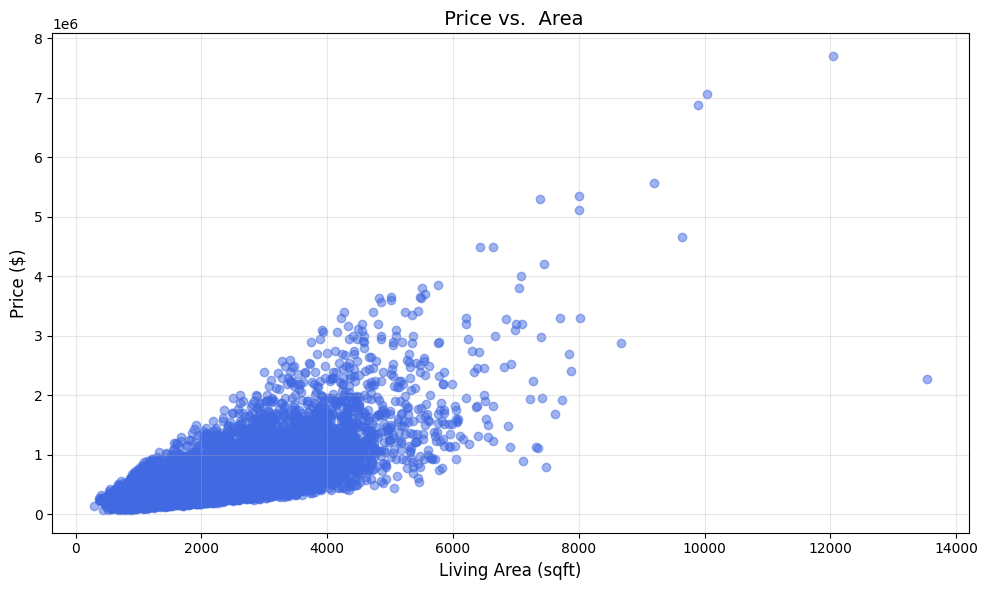

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, color='royalblue')
plt.title(' Price vs.  Area', fontsize=14)
plt.xlabel('Living Area (sqft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

1.2 Bubble Chart: Encode third variable using size or color

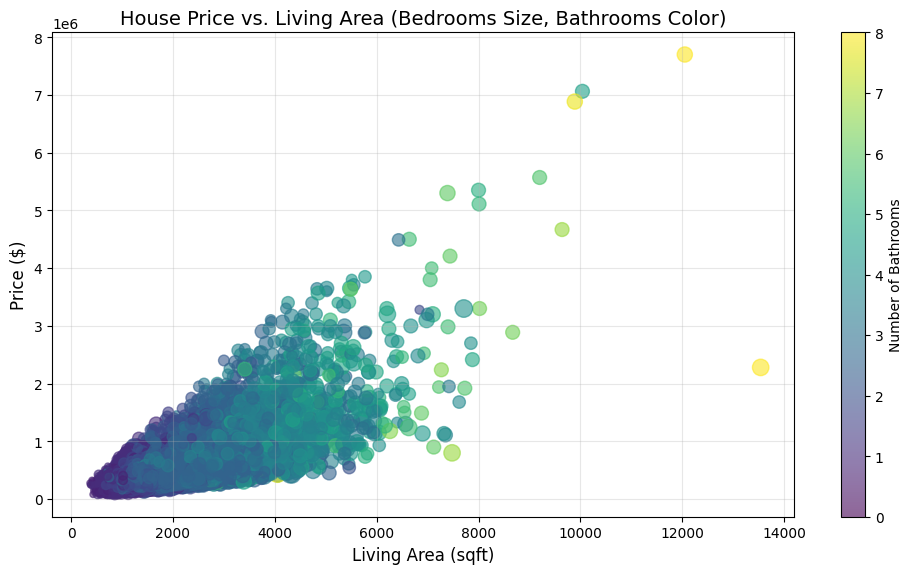

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['sqft_living'], 
    df['price'], 
    s=df['bedrooms']*20,  # Size represents bedrooms
    c=df['bathrooms'],    # Color represents bathrooms
    alpha=0.6,
    cmap='viridis'
)
plt.colorbar(scatter, label='Number of Bathrooms')
plt.title(' Price vs. Area (Bedrooms Size, Bathrooms Color)', fontsize=14)
plt.xlabel('Living Area (sqft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

1.3 Grouped / Color-Coded Scatter Plot using a categorical feature

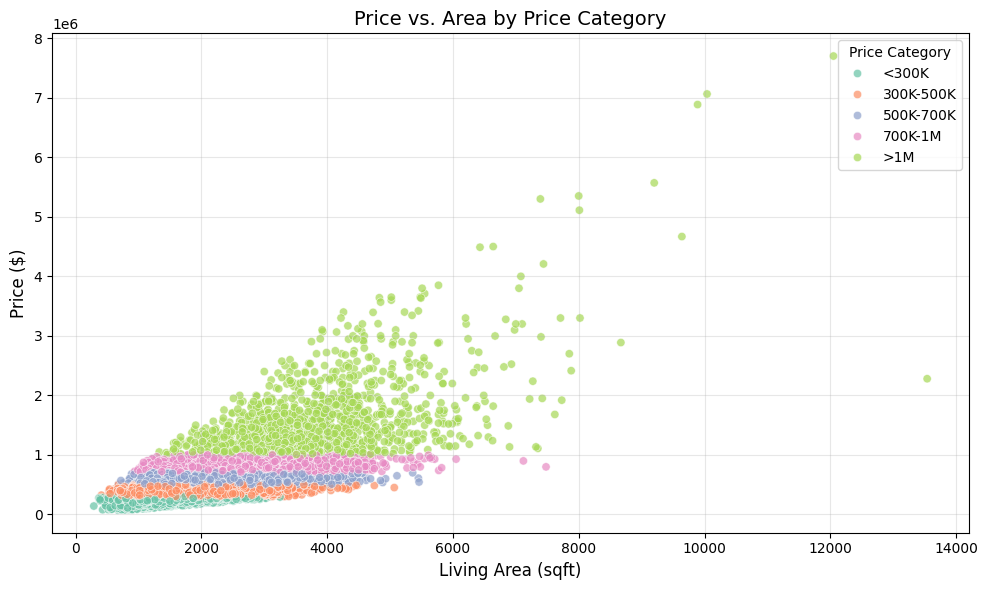

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='sqft_living', 
    y='price', 
    hue='price_category',
    palette='Set2',
    alpha=0.7
)
plt.title('Price vs. Area by Price Category', fontsize=14)
plt.xlabel('Living Area (sqft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Price Category')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

1.4 Regression Line (manual calculation using least squares method)

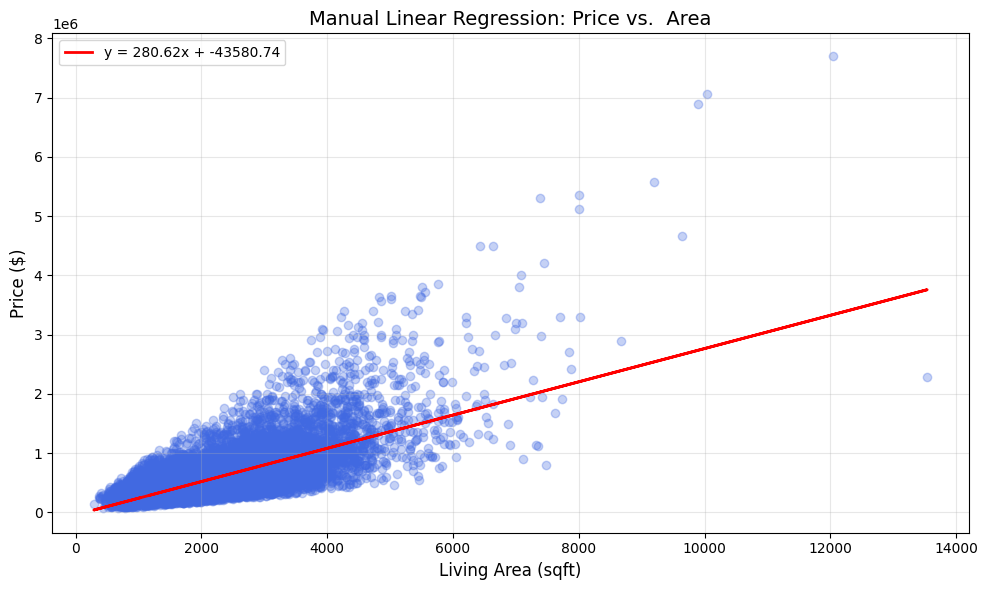

A 2500 sqft home would be valued at $657,978.18


In [11]:
# Manual linear regression
x = df['sqft_living'].values
y = df['price'].values
n = len(x)

x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * x_mean

# Predictions
y_pred = intercept + slope * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, color='royalblue')
plt.plot(x, y_pred, color='red', linewidth=2, 
         label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.title('Manual Linear Regression: Price vs.  Area', fontsize=14)
plt.xlabel('Living Area (sqft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Prediction example
example_size = 2500
predicted_price = slope * example_size + intercept
print(f"A 2500 sqft home would be valued at ${predicted_price:,.2f}")

1.5 Regression Line using `sklearn.linear_model.LinearRegression`


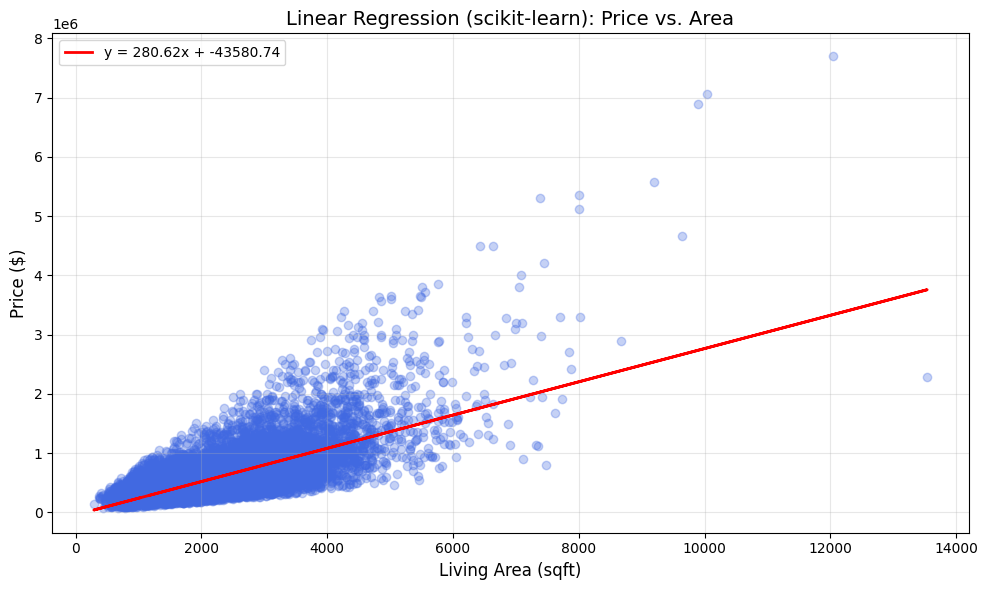

Manual slope: 280.6236 | sklearn slope: 280.6236
Manual intercept: -43580.7431 | sklearn intercept: -43580.7431


In [12]:
# Prepare data
X = df[['sqft_living']]
y = df['price']

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, color='royalblue')
plt.plot(X, y_pred, color='red', linewidth=2, 
         label=f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
plt.title('Linear Regression (scikit-learn): Price vs. Area', fontsize=14)
plt.xlabel('Living Area (sqft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Compare coefficients
print(f"Manual slope: {slope:.4f} | sklearn slope: {model.coef_[0]:.4f}")
print(f"Manual intercept: {intercept:.4f} | sklearn intercept: {model.intercept_:.4f}")

1.6 Scatter Matrix using `pandas.plotting.scatter_matrix()`

<Figure size 1200x800 with 0 Axes>

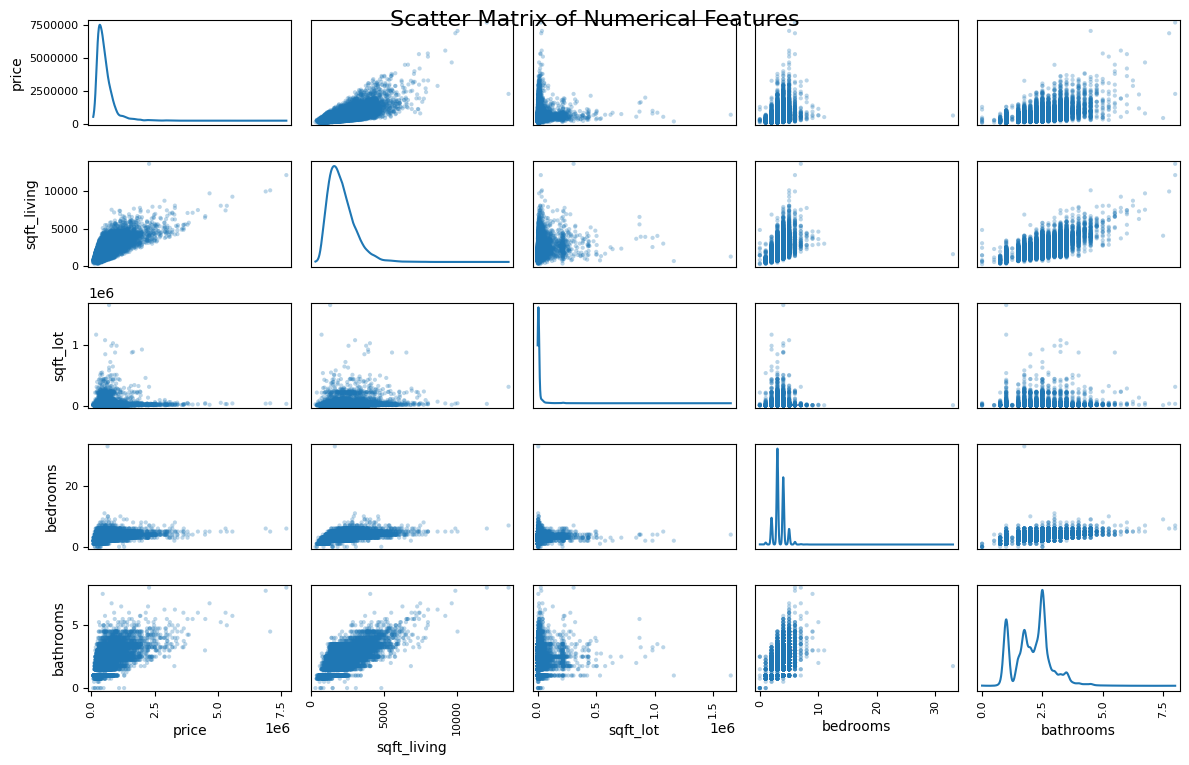

In [32]:


# Select key numerical features
numerical_features = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

plt.figure(figsize=(12, 8))
scatter_matrix(df[numerical_features], alpha=0.3, figsize=(12, 8), diagonal='kde')
plt.suptitle('Scatter Matrix of Numerical Features', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()

1.7 Pair Plot using `seaborn.pairplot()` with color grouping (`hue`)

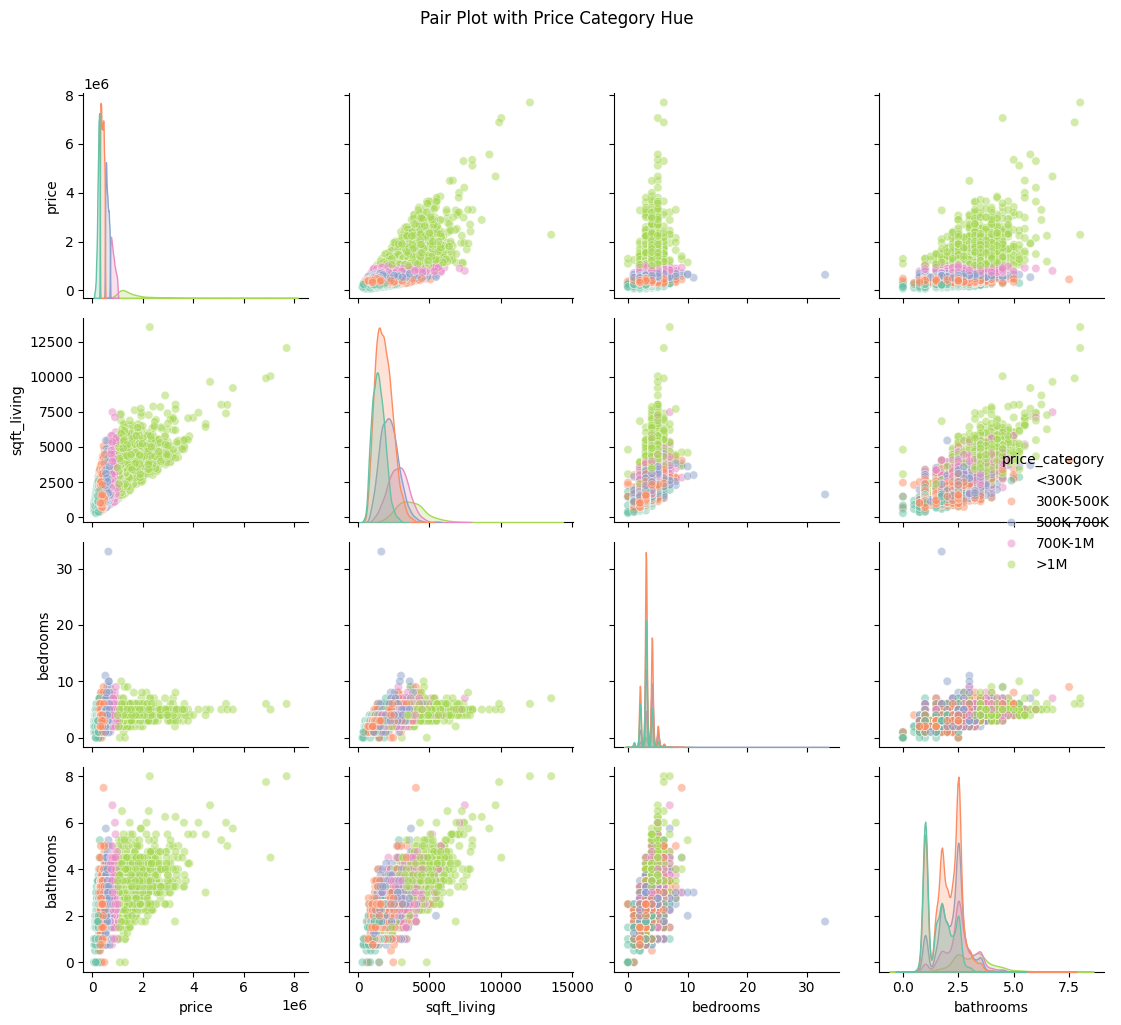

In [33]:
sns.pairplot(
    df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'price_category']], 
    hue='price_category',
    palette='Set2',
    plot_kws={'alpha': 0.5},
    height=2.5
)
plt.suptitle('Pair Plot with Price Category Hue', y=1.02)
plt.tight_layout()
plt.show()

2. Line Chart Visualizations

2.1 - [ ] Basic Line Chart (e.g., stock prices or sales over time)


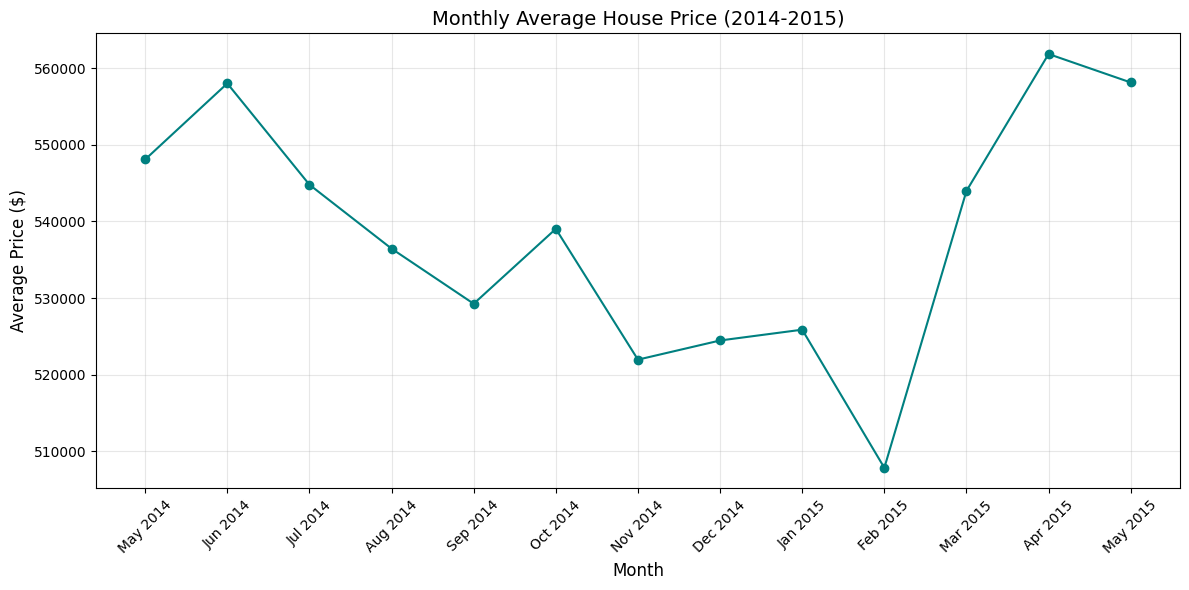

In [34]:
monthly_avg = df.groupby(['year', 'month', 'month_name'])['price'].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['month_name'] + ' ' + monthly_avg['year'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['year_month'], monthly_avg['price'], marker='o', color='teal')
plt.title('Monthly Average House Price (2014-2015)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

2.2 Multi-Series Line Chart (compare trends across multiple categories)


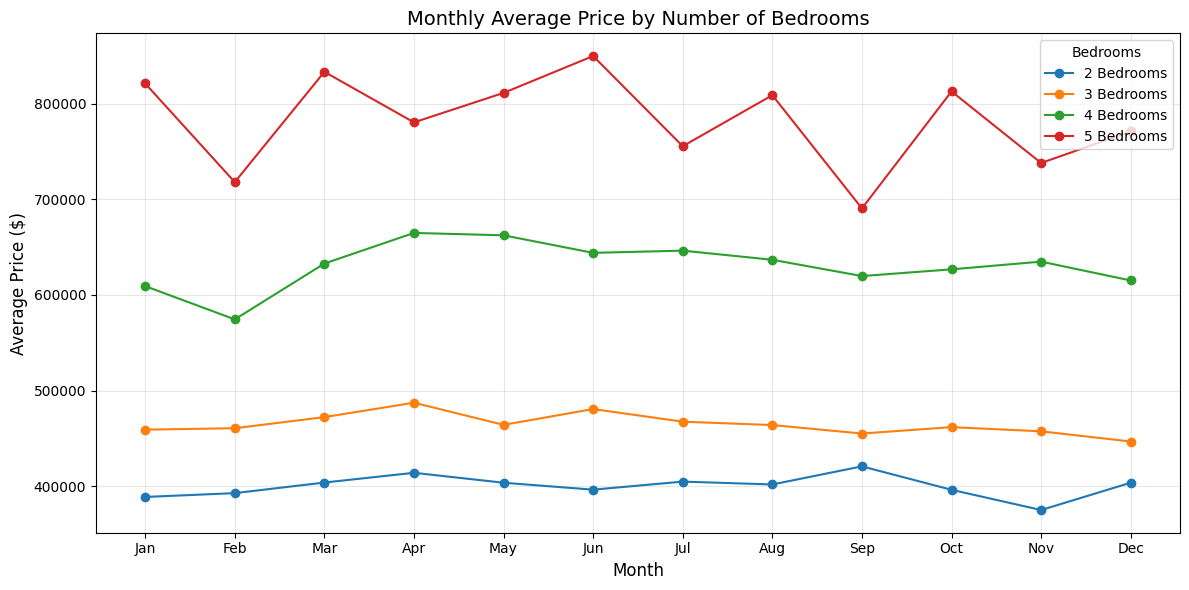

In [35]:
bedroom_avg = df.groupby(['month', 'bedrooms'])['price'].mean().reset_index()
bedroom_avg = bedroom_avg[bedroom_avg['bedrooms'].isin([2, 3, 4, 5])]  # Focus on common sizes

plt.figure(figsize=(12, 6))
for bedrooms in sorted(bedroom_avg['bedrooms'].unique()):
    subset = bedroom_avg[bedroom_avg['bedrooms'] == bedrooms]
    plt.plot(
        subset['month'], 
        subset['price'], 
        marker='o', 
        label=f'{bedrooms} Bedrooms'
    )

plt.title('Monthly Average Price by Number of Bedrooms', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])
plt.legend(title='Bedrooms')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

2.3 Stacked Area Chart (cumulative comparison of multiple series)


C:\Users\Asus\AppData\Local\Temp\ipykernel_17796\1298398337.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



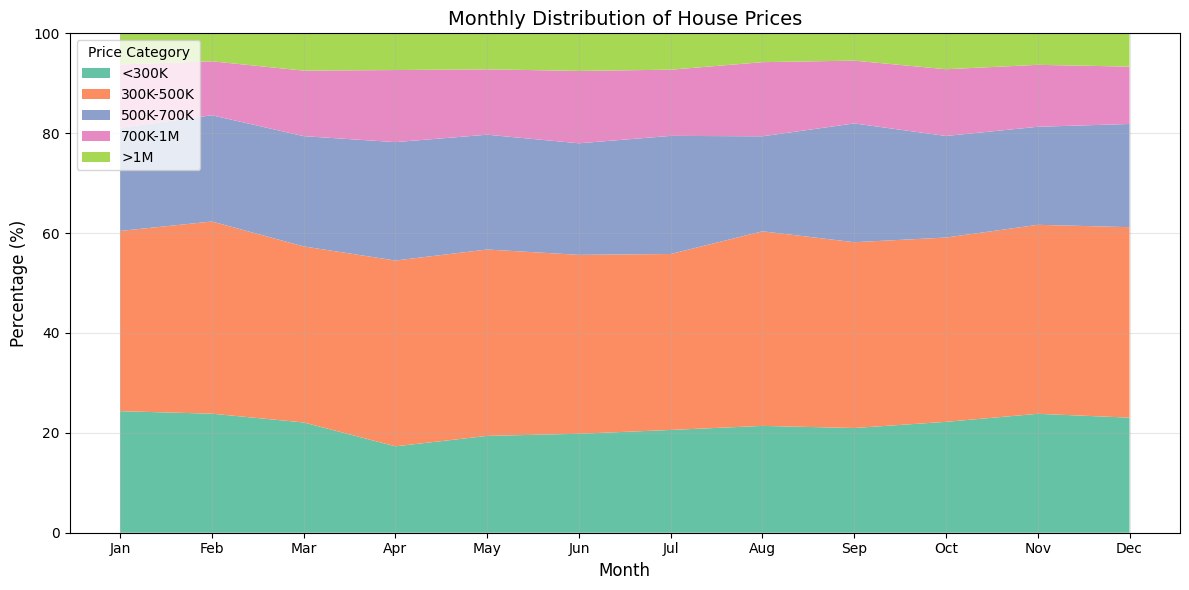

In [36]:
price_dist = df.groupby(['month', 'price_category'])['id'].count().unstack().fillna(0)
price_dist = price_dist.div(price_dist.sum(axis=1), axis=0) * 100  # Convert to percentages

plt.figure(figsize=(12, 6))
plt.stackplot(
    price_dist.index,
    price_dist.values.T,
    labels=price_labels,
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
)
plt.title('Monthly Distribution of House Prices', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])
plt.legend(title='Price Category', loc='upper left')
plt.ylim(0, 100)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

2.4 Spline/Smoothed Line Chart


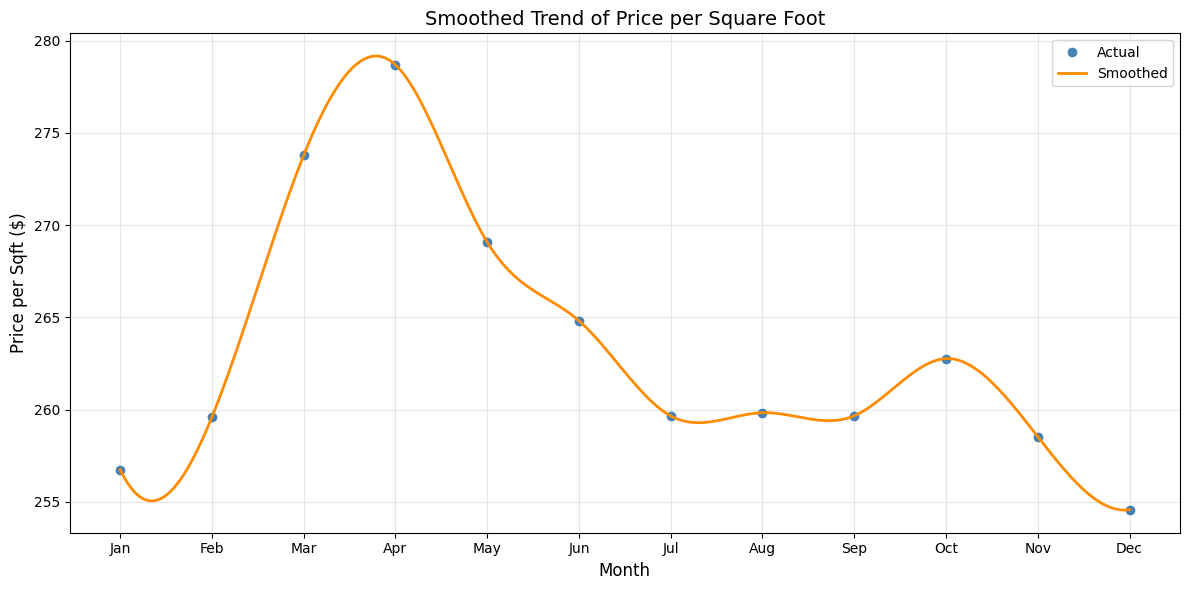

In [37]:

# Calculate monthly average
monthly_pps = df.groupby('month')['price_per_sqft'].mean()

# Create spline interpolation
x = np.array(monthly_pps.index)
y = monthly_pps.values
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)
y_smooth = spline(x_smooth)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', color='steelblue', label='Actual')
plt.plot(x_smooth, y_smooth, '-', color='darkorange', linewidth=2, label='Smoothed')
plt.title('Smoothed Trend of Price per Square Foot', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price per Sqft ($)', fontsize=12)
plt.xticks(x, [calendar.month_abbr[i] for i in x])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

2.5 Step Line Chart (data points change in steps rather than smooth flow)

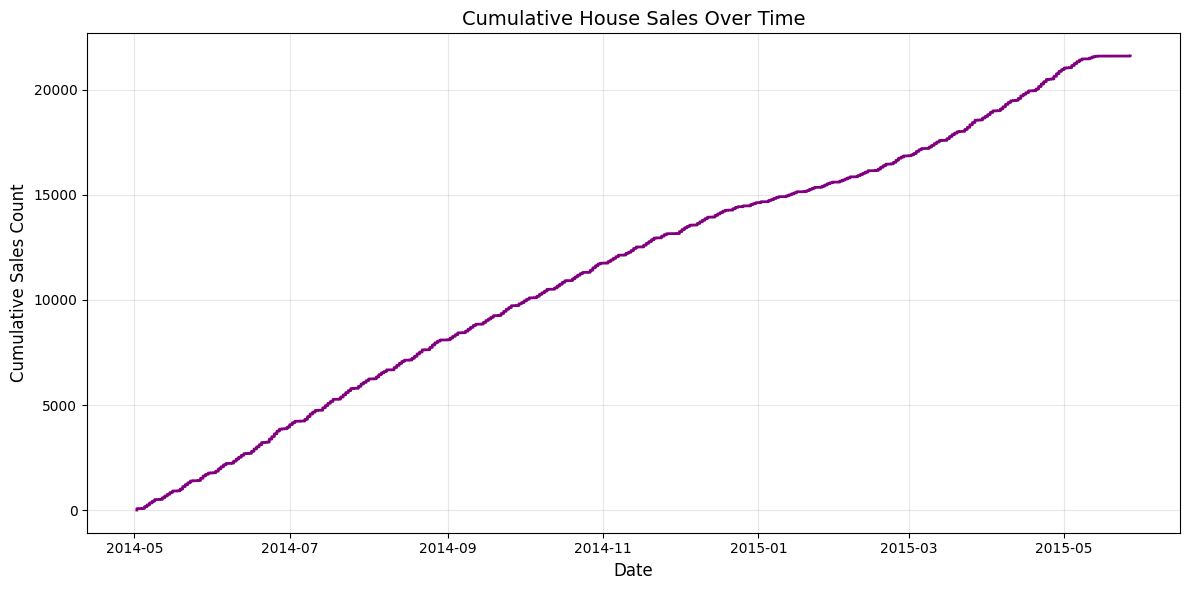

In [38]:
df_sorted = df.sort_values('date')
df_sorted['cumulative_sales'] = range(1, len(df) + 1)

plt.figure(figsize=(12, 6))
plt.step(df_sorted['date'], df_sorted['cumulative_sales'], 
         where='post', color='purple', linewidth=2)
plt.title('Cumulative House Sales Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Sales Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

3. Heatmap Visualizations



3.1 Basic Matrix Heatmap for any 2D array or numeric matrix


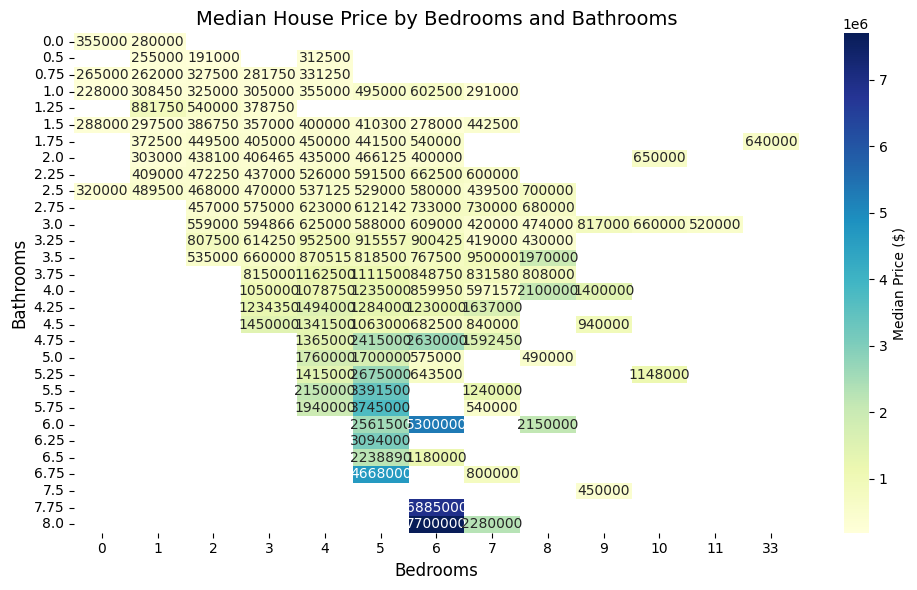

In [39]:
heatmap_data = df.pivot_table(
    index='bathrooms', 
    columns='bedrooms', 
    values='price', 
    aggfunc='median'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".0f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Median Price ($)'}
)
plt.title('Median House Price by Bedrooms and Bathrooms', fontsize=14)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Bathrooms', fontsize=12)
plt.tight_layout()
plt.show()

3.2 Correlation Heatmap using `.corr()` from Pandas

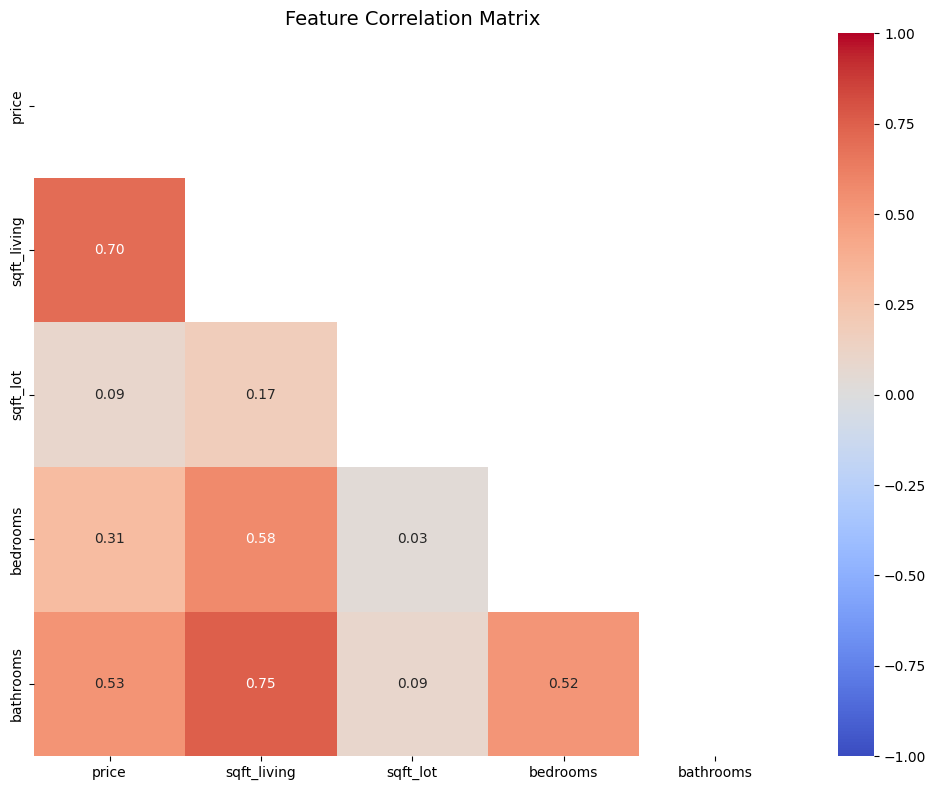

In [40]:

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create mask for upper triangle
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1,
    mask=mask  # Apply the mask correctly
)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

3.3 Custom Correlation Heatmap (manual calculation of Pearson/Spearman)

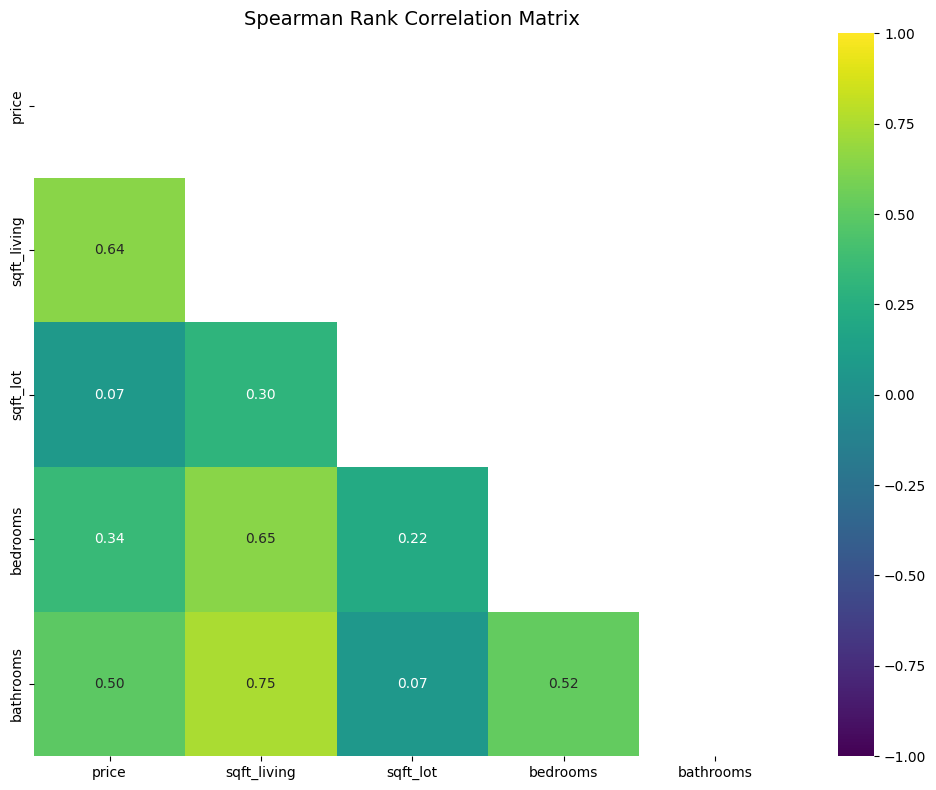

In [41]:

spearman_corr = df[numerical_features].corr(method='spearman')

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))  # Create mask
sns.heatmap(
    spearman_corr, 
    annot=True, 
    fmt=".2f", 
    cmap="viridis", 
    vmin=-1, 
    vmax=1,
    mask=mask  # Apply mask
)
plt.title('Spearman Rank Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

3.4  Calendar Heatmap (e.g., GitHub-style contribution heatmap)

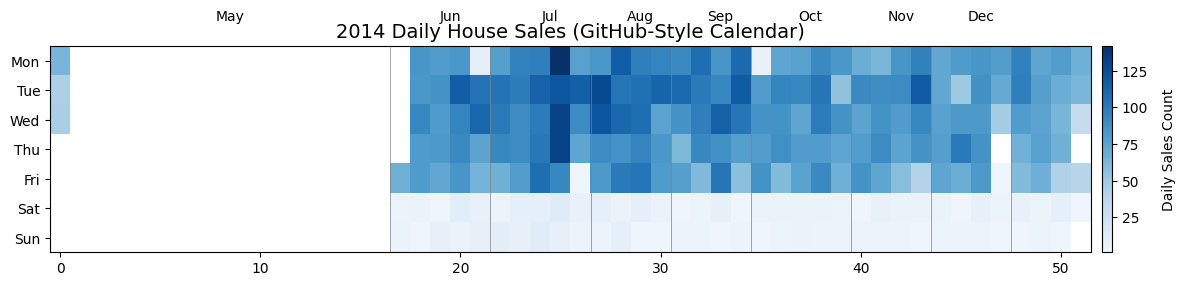

In [42]:

# Prepare daily sales data
daily_sales = df.groupby('date')['id'].count().reset_index()
daily_sales['year'] = daily_sales['date'].dt.year
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['day'] = daily_sales['date'].dt.day
daily_sales['weekday'] = daily_sales['date'].dt.weekday
daily_sales['week'] = daily_sales['date'].dt.isocalendar().week

# Create matrix for 2014
sales_2014 = daily_sales[daily_sales['year'] == 2014]
max_week = sales_2014['week'].max()
calendar_data = np.full((7, max_week), np.nan)  # 7 days x max weeks

for _, row in sales_2014.iterrows():
    if row['week'] <= max_week:  # Ensure week number is within range
        calendar_data[row['weekday'], row['week']-1] = row['id']

# Create visualization
plt.figure(figsize=(12, 3))
ax = plt.gca()
cmap = plt.cm.Blues(np.linspace(0, 1, 256)) 
cmap = mpl.colors.ListedColormap(cmap[10:, :-1])

# Plot heatmap
im = ax.imshow(calendar_data, cmap=cmap, aspect='auto')

# Add day labels
day_names = list(calendar.day_abbr)
ax.set_yticks(range(7))
ax.set_yticklabels(day_names)

# Add month separators
month_positions = []
prev_month = 0
for week in range(max_week):
    date = sales_2014[sales_2014['week'] == week+1]['date'].min()
    if pd.notnull(date):
        month = date.month
        if month != prev_month:
            month_positions.append(week)
            prev_month = month

for pos in month_positions:
    ax.axvline(pos-0.5, color='gray', linewidth=0.5)

# Add month labels
month_names = [calendar.month_abbr[i] for i in range(5, 13)]  # May to December
for i, month in enumerate(month_names):
    if i < len(month_positions):
        pos = month_positions[i]
        next_pos = month_positions[i+1] if i+1 < len(month_positions) else max_week
        mid_pos = pos + (next_pos - pos)/2
        ax.text(mid_pos, -1.5, month, ha='center', va='center')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.02, pad=0.01)
cbar.set_label('Daily Sales Count', labelpad=10)

plt.title('2014 Daily House Sales (GitHub-Style Calendar)', fontsize=14)
plt.tight_layout()
plt.show()

 3.5 Clustered Heatmap using `seaborn.clustermap()`
  - Include dendrograms for both rows and columns
  - Describe clusters formed and their interpretation

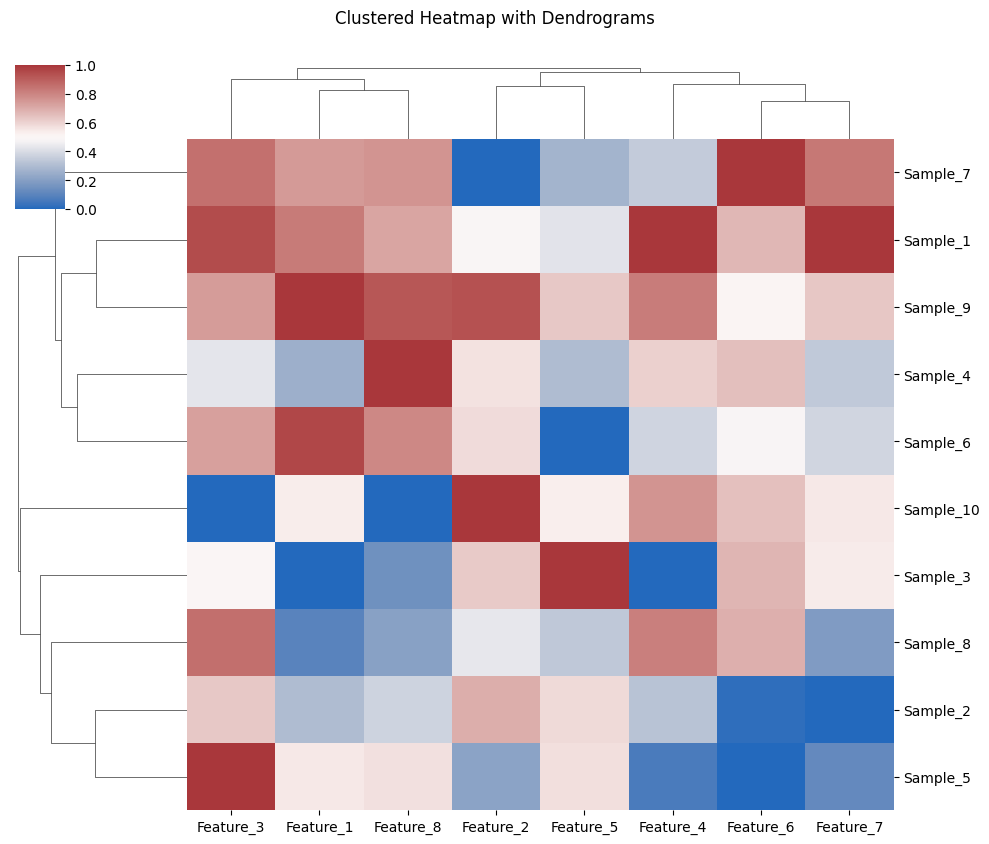

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate sample data (e.g., gene expression or customer features)
np.random.seed(42)
data = pd.DataFrame(
    np.random.randn(10, 8),
    index=[f"Sample_{i}" for i in range(1, 11)],
    columns=[f"Feature_{j}" for j in range(1, 9)]
)

# Create clustered heatmap with dendrograms for rows and columns
cg = sns.clustermap(
    data,
    method='average',       # linkage method for clustering (e.g., 'single', 'complete', 'average')
    metric='euclidean',     # distance metric
    cmap='vlag',            # color map for heatmap
    standard_scale=1,       # normalize data across columns
    figsize=(10, 8),
    dendrogram_ratio=(.2, .1),  # size of dendrograms (row, col)
    cbar_pos=(0.02, .8, .05, .18)  # position of colorbar
)

plt.suptitle("Clustered Heatmap with Dendrograms", y=1.05)
plt.show()


3.6 Geographic Heatmap (Non-spatial)
  - Use `plotly`, `folium`, or any mapping library
  - Highlight heat using region/state/country-level summaries (e.g., COVID cases, sales by region)

In [4]:
import folium
import pandas as pd
import json
import requests

# Sample data: state-level values (abbreviations + some value)
data = pd.DataFrame({
    'state': ['CA', 'TX', 'NY', 'FL', 'IL'],
    'value': [1000, 800, 600, 700, 500]
})

# Load US states GeoJSON
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states_geo = requests.get(url).json()

# Create Folium map centered on US
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add Choropleth layer
folium.Choropleth(
    geo_data=states_geo,
    name='choropleth',
    data=data,
    columns=['state', 'value'],
    key_on='feature.id',  # state abbreviation in GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sample Values by State'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display map (in Jupyter, this renders inline)
m
